In [3]:
import pandas as pd

import matplotlib.pyplot as plt

my_df = pd.read_excel("23-24.ods", sheet_name="Journal",header=4, index_col=3,
             parse_dates=True)

# isolate km column, and remove NaN
km_df = my_df["km"]
km_df.dropna(inplace=True)

# reindex day by day
new_idx = pd.date_range(start=km_df.index[0], end=km_df.index[-1], freq='D')
km_reindexed=km_df.reindex(new_idx)




# isolate km column, and remove NaN
moy_df = my_df["moy"]
moy_df.dropna(inplace=True)

# reindex day by day
new_idx = pd.date_range(start=moy_df.index[0], end=moy_df.index[-1], freq='D')
moy_reindexed=moy_df.reindex(new_idx)



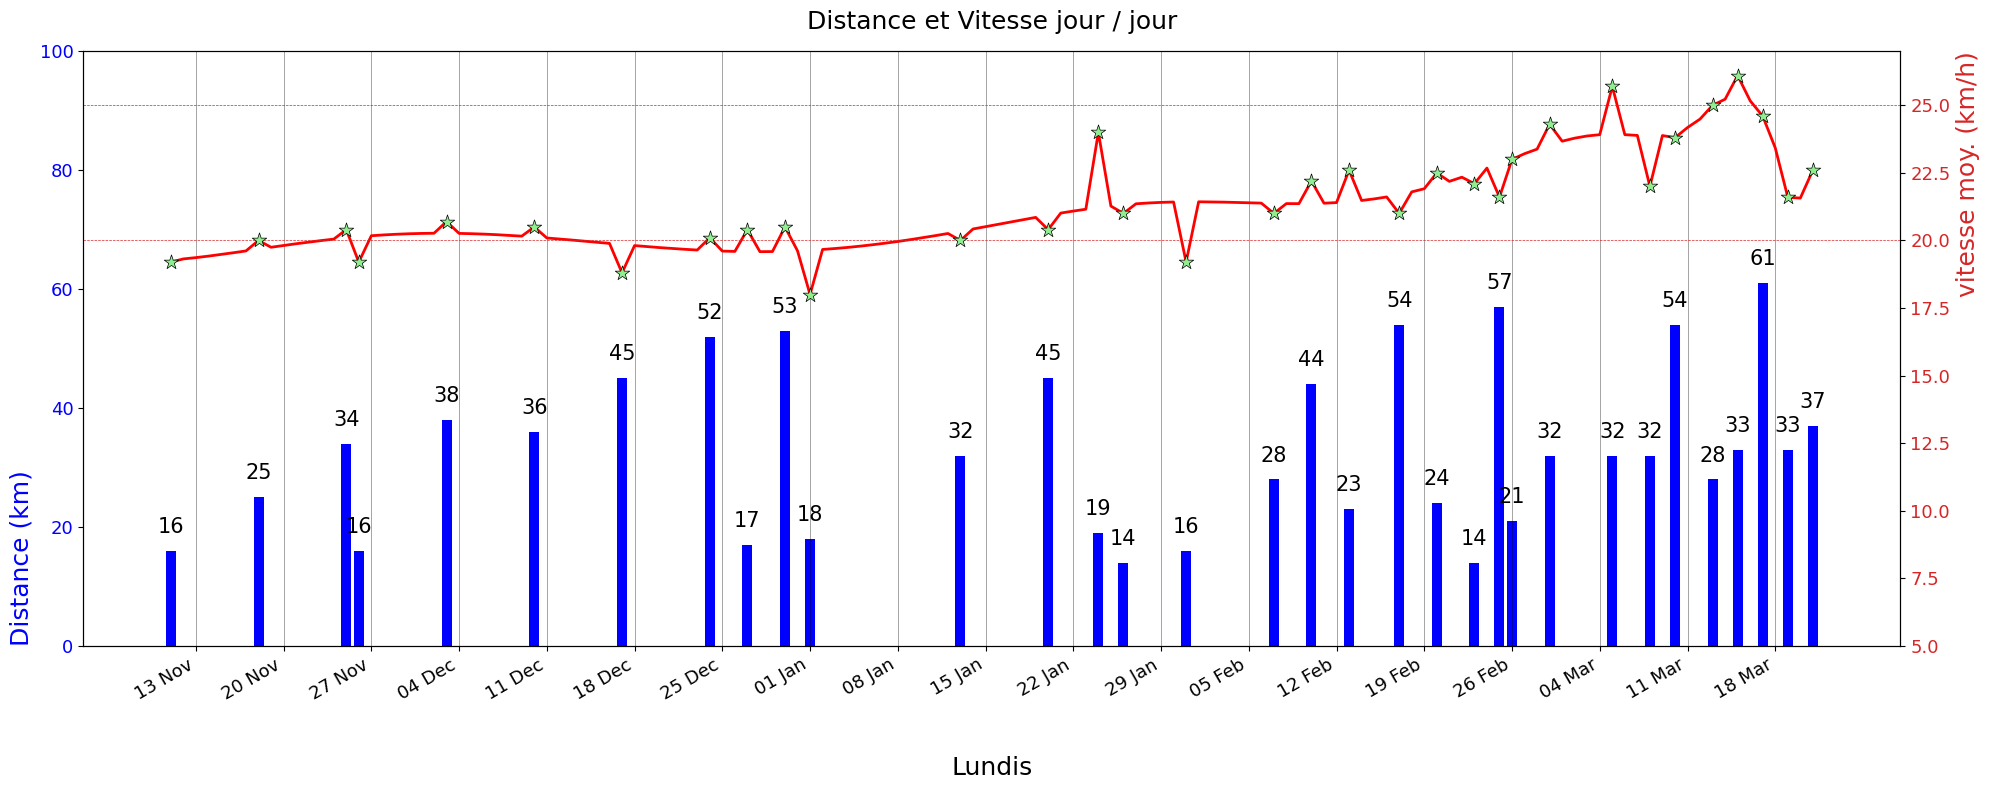

In [4]:

import matplotlib.dates as mdates
label_fontsize = 18
bar_color = "blue"
moy_color = "red"
monday_idx = pd.date_range(start=km_df.index[0], end=km_df.index[-1], freq=pd.offsets.Week(weekday=0))

# print(moy_reindexed)
fig, ax1 = plt.subplots(1, figsize=(20,8))
ax1.set_title("Distance et Vitesse jour / jour", y=1.0, pad=16)
ax1.set_ylim([0, 100])

ax1.tick_params(axis='x', labelsize=label_fontsize-5, rotation=30)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax1.set_xticks(monday_idx)
ax1.set_xticklabels (ax1.get_xticklabels(), ha="right")

ax1.set_xlabel("Lundis", fontsize=label_fontsize, labelpad=38.0)

bar_container = ax1.bar(km_reindexed.index, km_reindexed, color=bar_color, width=0.8)
ax1.bar_label(bar_container, label_type="edge", padding=10, zorder=8, color="black", fontsize=15)
              # bbox=dict(facecolor='white', edgecolor='black'))
ax1.set_ylabel("Distance (km)", color=bar_color, fontsize=label_fontsize, loc="bottom")
ax1.tick_params(axis='y', labelcolor=bar_color, labelsize=label_fontsize-5)
ax1.title.set_size(18)

for monday in monday_idx:
    plt.axvline(monday,color='black', lw=0.5, alpha=0.5, linestyle='-')
    
# for _hl in [20, 50]:
#     ax1.axhline( _hl, color = bar_color, lw=0.5,  alpha=1, linestyle = '--') 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([5, 27])
color = 'tab:red'
for _hl in [20, 25]:
    ax2.axhline( _hl, color = color, lw=0.5,  alpha=1, linestyle = '--') 

ax2.set_ylabel('vitesse moy. (km/h)', color=color, fontsize=label_fontsize, loc="top")  # we already handled the x-label with ax1
ax2.plot(moy_reindexed.index, moy_reindexed.interpolate(method="spline", order=5), color="red", lw=2, zorder=-4)
# ax2.plot(moy_reindexed.index, moy_reindexed, color="red", lw=2, zorder=-4)
ax2.scatter(moy_reindexed.index, moy_reindexed, marker="*", zorder=3, color="lightgreen", edgecolor="black", lw=0.5, s=120)
ax2.tick_params(axis='y', labelcolor=color, labelsize=label_fontsize-5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




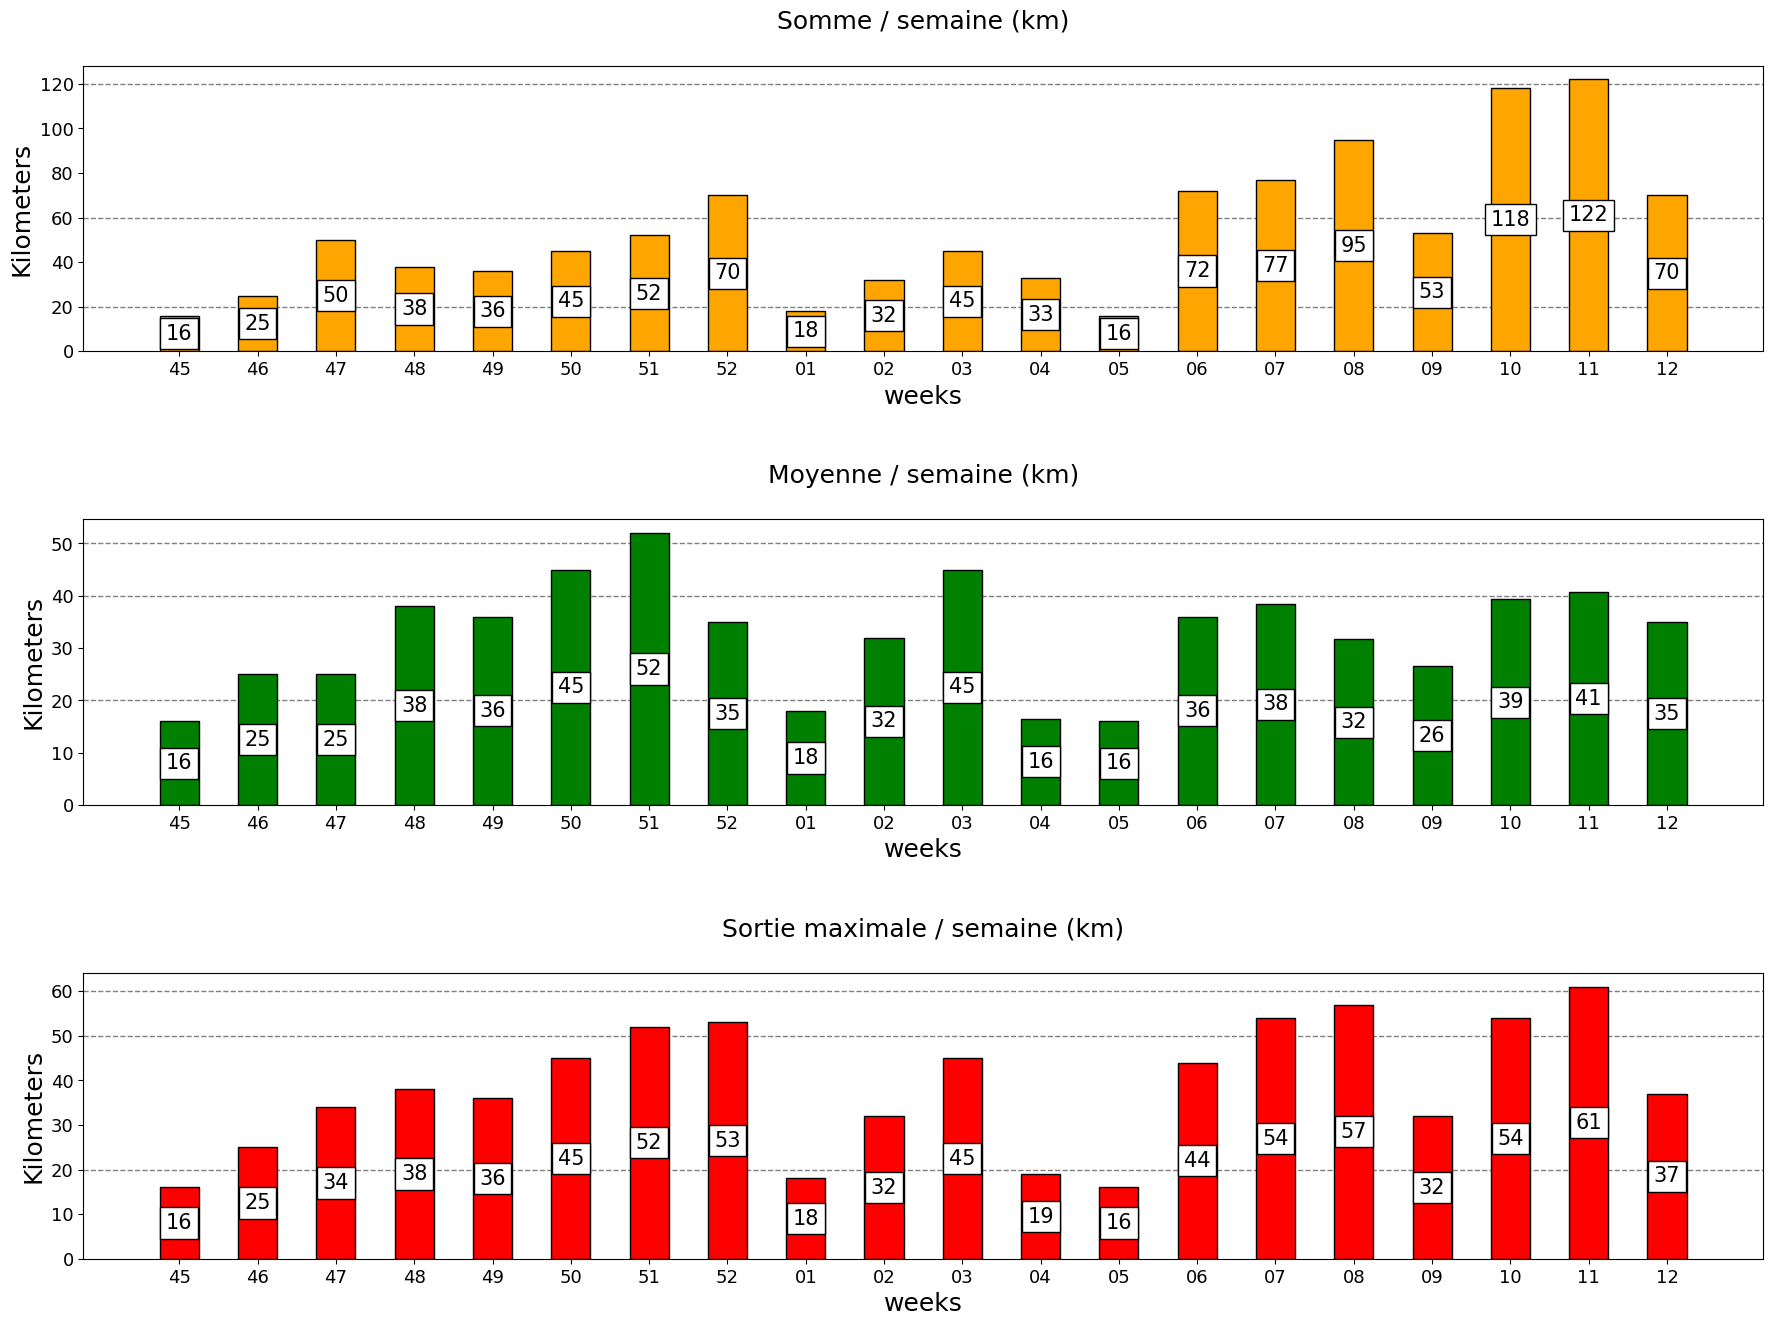

In [5]:



# Reindex by week num
km_w = km_reindexed.copy()
km_w.index = pd.to_datetime(km_w.index, format = '%Y-%m-%d').strftime('%W')
var = km_w.groupby(by=km_w.index).sum()



km_w = km_df.to_frame()
km_w["w_num"] = km_w.index.strftime("%W")
km_w_sum = km_w.groupby(by=km_w["w_num"], sort=False).agg("sum")
km_w_mean = km_w.groupby(by=km_w["w_num"], sort=False).agg("mean")
km_w_max = km_w.groupby(by=km_w["w_num"], sort=False).agg("max")

figures_meta =[
    {"title": "Somme / semaine (km)",
     "data": km_w_sum.km,
     "xlabel": "weeks",
     "hlines": [20, 60, 120],
     "bl_color": "black",
     "color": "orange"},
    {"title": "Moyenne / semaine (km)",
     "data": km_w_mean.km,
     "xlabel": "weeks",
     "hlines": [20, 40, 50],
     "bl_color": "white",
     "color": "green"},
    {"title": "Sortie maximale / semaine (km)",
     "xlabel": "weeks",
     "hlines": [20, 50, 60],
     "bl_color": "blue",
     "data": km_w_max.km,
     "color": "red"},
]

from matplotlib import dates as mdates

# sys.exit()
fig, ax = plt.subplots(len(figures_meta),  figsize=(20,15), sharey=False)
fig.tight_layout(pad=10.0)
for i, _meta in enumerate(figures_meta):
    # ax2=ax[i].twiny()
    # ax2.xaxis.set_major_locator(mdates.MonthLocator())
    # ax2.xaxis.set_major_locator(mdates.MonthLocator())kjj
    # ax2.set_ylabel('Month', color="blue", fontsize=label_fontsize)  # we already handled the x-label with ax1
    # ax2.plot(new_idx)
    # ax2.scatter(moy_reindexed.index, moy_reindexed, zorder=3, color="green", edgecolor="black", lw=0.5, s=120)
    # ax2.tick_params(axis='y', labelcolor=color, labelsize=label_fontsize-5)

    ax[i].tick_params(axis='y', labelsize=label_fontsize-5)
    ax[i].tick_params(axis='x', labelsize=label_fontsize-5)
    ax[i].set_ylabel("Kilometers", fontsize=label_fontsize)
    ax[i].set_xlabel(_meta["xlabel"], fontsize=label_fontsize)
    ax[i].set_title(_meta["title"], y=1.1)#, pad=-16)
    ax[i].title.set_size(18)
    for _hl in _meta["hlines"]:
        ax[i].axhline( _hl, color = 'black', lw=1,  alpha=0.5, linestyle = '--')
    bar_container = ax[i].bar(_meta["data"].index, _meta["data"], color=_meta["color"], width=0.5, zorder=2, edgecolor="black")
    ax[i].bar_label(bar_container, label_type="center", color="black", fmt='%.f', fontsize=15,
                   bbox=dict(facecolor='white', edgecolor="black") )

    
    # addlabels(_meta["data"].index, _meta["data"])
# ax[1].bar(km_w_sum.index, km_w_sum.km, color="orange", suptitle="SUM")
# ax[2].bar(km_w_sum.index, km_w_mean.km, color="green")
# ax[3].bar(km_w_sum.index, km_w_max.km, color="red")